In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the data
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru raw data.xlsx"
data = pd.read_excel(file_path)

# Calculate daily statistics
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
daily_data = data.groupby('Date').agg({
    'Dry Bulb Temperature': ['min', 'max'],
    'Relative Humidity': 'mean',
    'Global Horizontal Radiation': lambda x: x[x > 50].mean()
}).dropna()

daily_data.columns = ['Dry Bulb Temp Min', 'Dry Bulb Temp Max', 'Relative Humidity Mean', 'Global Horizontal Radiation Mean']

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(daily_data)

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
daily_data['Cluster'] = kmeans.fit_predict(data_scaled)

# Ensure clusters are continuous
daily_data = daily_data.sort_values(by=['Cluster', 'Date'])

# Function to merge small clusters
def merge_small_clusters(labels, min_size):
    unique, counts = np.unique(labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    
    # Find clusters with size less than min_size
    small_clusters = [k for k, v in cluster_sizes.items() if v < min_size]
    
    for cluster in small_clusters:
        # Find indices of the points in the small cluster
        cluster_indices = np.where(labels == cluster)[0]
        
        # For each point in the small cluster, find the closest larger cluster
        for idx in cluster_indices:
            # Calculate the distance to all other points
            distances = np.linalg.norm(data_scaled[idx] - data_scaled, axis=1)
            # Exclude points in the same small cluster
            distances[cluster_indices] = np.inf
            # Find the closest point in a different cluster
            closest_point_idx = np.argmin(distances)
            # Assign the point to the cluster of the closest point
            labels[idx] = labels[closest_point_idx]
    
    return labels

# Ensure each cluster has at least 30 days
daily_data['Cluster'] = merge_small_clusters(daily_data['Cluster'].values, 30)

# Save the results to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru_clustered_daily_data.xlsx'
daily_data.to_excel(output_file_path, index=False)

print(f"Clustered data saved to {output_file_path}")


Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Bengaluru_clustered_daily_data.xlsx


In [3]:

#better code


import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score

# Load the data
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/IndoreChatgpt.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Calculate daily statistics
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
daily_data = data.groupby('Date').agg({
    'DBT': ['min', 'max'],
    'RH': 'mean',
    'GHI': lambda x: x[x > 50].mean()
}).dropna()

daily_data.columns = ['Dry Bulb Temp Min', 'Dry Bulb Temp Max', 'Relative Humidity Mean', 'Global Horizontal Radiation Mean']

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(daily_data)

# Determine the optimal number of clusters (between 3 and 6)
best_k = 3
best_score = -1
for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
daily_data['Cluster'] = kmeans.fit_predict(data_scaled)

# Save the results to a new Excel file
output_file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/IndoreChatgpt2.csv"  # Replace with the desired output file path
daily_data.to_csv(output_file_path, index=False)

print(f"Clustered data saved to {output_file_path}")

Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/IndoreChatgpt2.csv


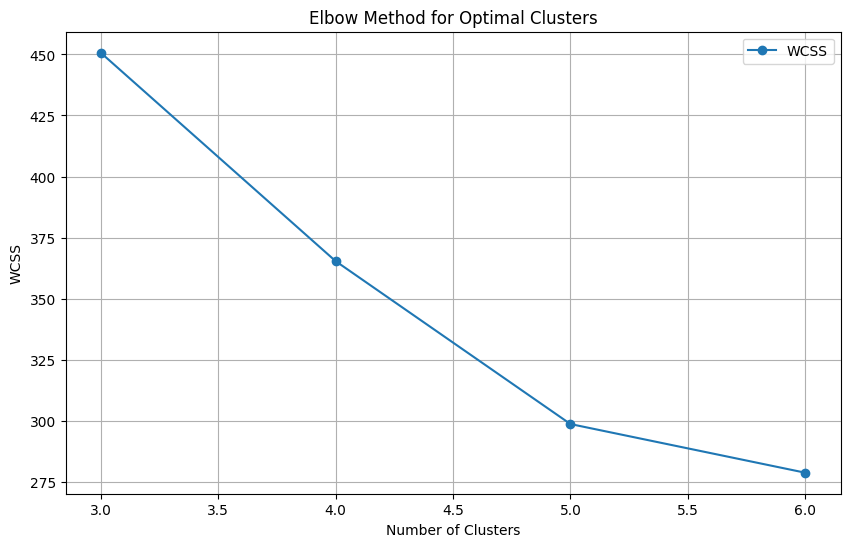

Optimal number of clusters based on silhouette score: 3
Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/IndoreChatgpt3.csv


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/IndoreChatgpt.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Calculate daily statistics
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
daily_data = data.groupby('Date').agg({
    'DBT': ['min', 'max'],
    'RH': 'mean',
    'GHI': lambda x: x[x > 50].mean()
}).dropna()

daily_data.columns = ['Dry Bulb Temp Min', 'Dry Bulb Temp Max', 'Relative Humidity Mean', 'Global Horizontal Radiation Mean']

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(daily_data)

# Determine the optimal number of clusters (between 3 and 6) using both the elbow method and silhouette score
wcss = []
silhouette_scores = []

for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(3, 7), wcss, marker='o', label='WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Determine the optimal number of clusters based on the silhouette score
best_k = 3
best_score = max(silhouette_scores)
best_k = silhouette_scores.index(best_score) + 3

print(f"Optimal number of clusters based on silhouette score: {best_k}")

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
daily_data['Cluster'] = kmeans.fit_predict(data_scaled)

# Save the results to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/IndoreChatgpt3.csv'  # Replace with the desired output file path
daily_data.to_csv(output_file_path, index=False)

print(f"Clustered data saved to {output_file_path}")


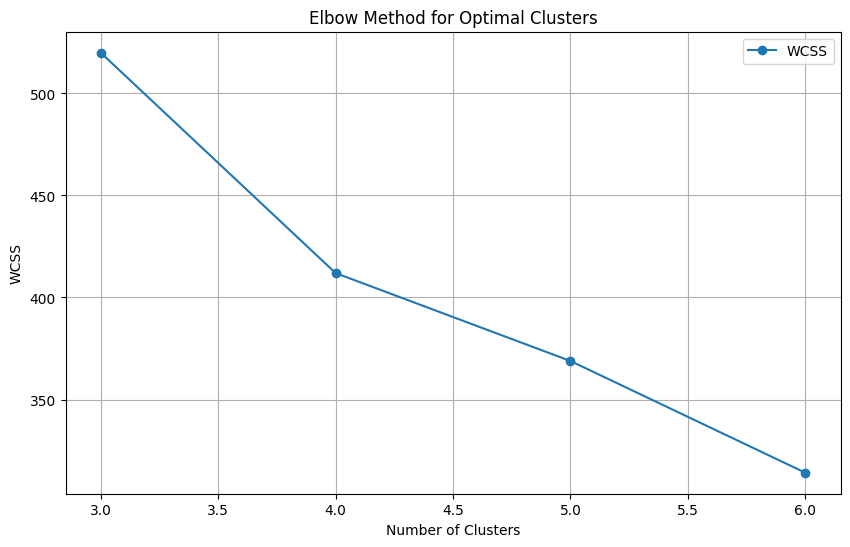

Optimal number of clusters based on silhouette score: 3


ValueError: No engine for filetype: 'excel'

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/delhi raw file.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Calculate daily statistics
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
daily_data = data.groupby('Date').agg({
    'Dry Bulb Temperature': ['min', 'max'],
    'Relative Humidity': 'mean',
    'Global Horizontal Radiation': lambda x: x[x > 50].mean()
}).dropna()

daily_data.columns = ['Dry Bulb Temp Min', 'Dry Bulb Temp Max', 'Relative Humidity Mean', 'Global Horizontal Radiation Mean']

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(daily_data)

# Determine the optimal number of clusters (between 3 and 6) using both the elbow method and silhouette score
wcss = []
silhouette_scores = []

for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(3, 7), wcss, marker='o', label='WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Determine the optimal number of clusters based on the silhouette score
best_k = 3
best_score = max(silhouette_scores)
best_k = silhouette_scores.index(best_score) + 3

print(f"Optimal number of clusters based on silhouette score: {best_k}")

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
daily_data['Cluster'] = kmeans.fit_predict(data_scaled)

# Save the results to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/delhi raw file trial.excel'  # Replace with the desired output file path
daily_data.to_excel(output_file_path, index=False)

print(f"Clustered data saved to {output_file_path}")

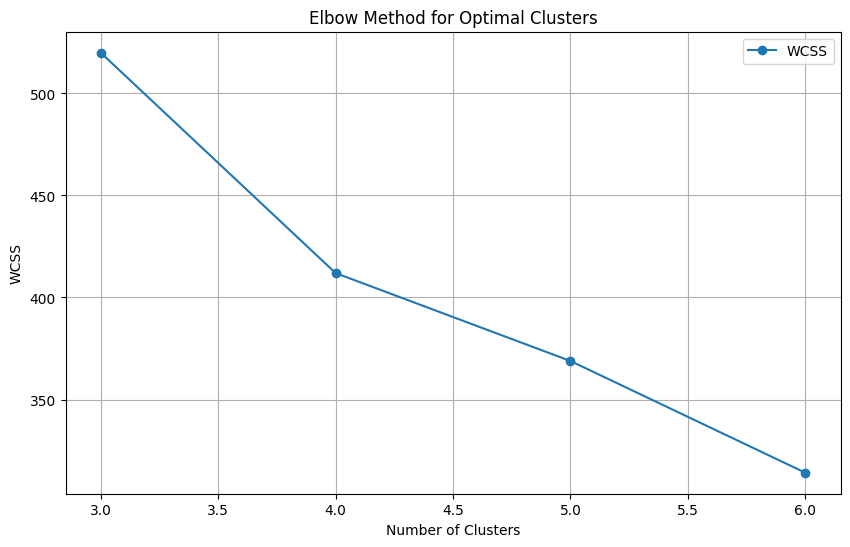

Optimal number of clusters based on silhouette score: 3


ValueError: No engine for filetype: 'excel'

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/delhi raw file.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Calculate daily statistics
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
daily_data = data.groupby('Date').agg({
    'Dry Bulb Temperature': ['min', 'max'],
    'Relative Humidity': 'mean',
    'Global Horizontal Radiation': lambda x: x[x > 50].mean()
}).dropna()

daily_data.columns = ['Dry Bulb Temp Min', 'Dry Bulb Temp Max', 'Relative Humidity Mean', 'Global Horizontal Radiation Mean']

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(daily_data)

# Determine the optimal number of clusters (between 3 and 6) using both the elbow method and silhouette score
wcss = []
silhouette_scores = []

for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(3, 7), wcss, marker='o', label='WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Determine the optimal number of clusters based on the silhouette score
best_k = 3
best_score = max(silhouette_scores)
best_k = silhouette_scores.index(best_score) + 3

print(f"Optimal number of clusters based on silhouette score: {best_k}")

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
daily_data['Cluster'] = kmeans.fit_predict(data_scaled)

# Save the results to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/delhi raw file trial2.excel'  # Replace with the desired output file path
daily_data.to_excel(output_file_path, index=False)

print(f"Clustered data saved to {output_file_path}")


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the data from the Excel file
df = pd.read_excel('delhi raw file.xlsx')

# Filter the data based on the given conditions
df_filtered = df.groupby('Day').agg(
    min_dry_bulb_temp=('Dry Bulb Temperature', 'min'),
    max_dry_bulb_temp=('Dry Bulb Temperature', 'max'),
    mean_relative_humidity=('Relative Humidity', 'mean'),
    mean_global_horizontal_radiation=('Global Horizontal Radiation', 'mean')
)

# Filter Global Horizontal Radiation values greater than 50
df_filtered = df_filtered[df_filtered['mean_global_horizontal_radiation'] > 50]

# Select the relevant features for clustering
features = ['min_dry_bulb_temp', 'max_dry_bulb_temp', 'mean_relative_humidity', 'mean_global_horizontal_radiation']
X = df_filtered[features]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of clusters
min_clusters = 3
max_clusters = 6

# Iterate through the range of clusters and find the optimal number of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Create a KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model to the scaled data
    kmeans.fit(X_scaled)

    # Get the cluster labels for each day
    labels = kmeans.labels_

    # Create a new DataFrame with the cluster labels
    df_filtered['Cluster'] = labels

    # Check if each cluster has at least 30 days
    cluster_counts = df_filtered['Cluster'].value_counts()
    if cluster_counts.min() >= 30:
        # Print the number of days in each cluster
        print(f"Number of clusters: {n_clusters}")
        print(cluster_counts)
        break

# Print the final cluster assignments
print("\nFinal cluster assignments:")
print(df_filtered)

output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/delhi raw file trial8.xlsx'  # Replace with the desired output file path
df_filtered.to_excel(output_file_path, index=False)


Final cluster assignments:
     min_dry_bulb_temp  max_dry_bulb_temp  mean_relative_humidity  \
Day                                                                 
1                  9.6               40.5               52.166667   
2                  7.2               41.2               58.177083   
3                 10.2               41.4               57.017361   
4                  7.9               41.8               57.902778   
5                  7.8               43.5               59.076389   
6                  6.7               43.4               55.770833   
7                  7.4               41.0               58.354167   
8                  6.0               39.3               59.128472   
9                  5.6               40.2               55.378472   
10                 7.7               42.4               59.118056   
11                 7.6               42.5               58.909722   
12                 5.1               38.9               61.822917   
13    

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/delhi raw file.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 50].mean())
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6, ideal_clusters=[4, 5]):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 20):  # Ensure each cluster has at least 30 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Save the daily data with clusters to a new Excel file
output_file_path = 'clustered_weather_data.xlsx'
# cluster_counts_final.to_excel(output_file_path)
print(f'Clustered data saved to {output_file_path}')


Number of clusters: 4
Cluster
2    116
1    112
0    111
3     26
Name: count, dtype: int64
Clustered data saved to clustered_weather_data.xlsx


In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/delhi raw file.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 50].mean())
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6, ideal_clusters=[4, 5]):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 0):  # Ensure each cluster has at least 0 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Save the daily data with clusters to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/delhi raw file trial000.xlsx'
daily_data.to_excel(output_file_path, index=True)
print(f'Clustered data saved to {output_file_path}')

# Print the days along with their assigned cluster numbers
print(daily_data[['Cluster']])



Number of clusters: 4
Cluster
2    116
1    112
0    111
3     26
Name: count, dtype: int64
Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/delhi raw file trial000.xlsx
            Cluster
Day                
2005-01-01        2
2005-01-02        3
2005-01-03        3
2005-01-04        2
2005-01-05        2
...             ...
2005-12-27        2
2005-12-28        2
2005-12-29        2
2005-12-30        2
2005-12-31        2

[365 rows x 1 columns]


In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Hyderabad raw data.xlsx'  # Replace with your file path "C:\Users\Alok Kumar Pandey\OneDrive\Desktop\coding\Hyderabad_daily_temperature_statistics.xlsx"
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 50].mean())
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6, ideal_clusters=[4, 5]):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 20):  # Ensure each cluster has at least 30 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Save the daily data with clusters to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Hyderabad raw data trial1.xlsx'
daily_data.to_excel(output_file_path, index=True)
print(f'Clustered data saved to {output_file_path}')

# Print the days along with their assigned cluster numbers
print(daily_data[['Cluster']])


Number of clusters: 4
Cluster
2    120
0    101
3     99
1     45
Name: count, dtype: int64
Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Hyderabad raw data trial1.xlsx
            Cluster
Day                
2005-01-01        1
2005-01-02        3
2005-01-03        2
2005-01-04        2
2005-01-05        2
...             ...
2005-12-27        2
2005-12-28        2
2005-12-29        2
2005-12-30        3
2005-12-31        2

[365 rows x 1 columns]


Number of clusters: 4
Cluster
2    123
0    101
3     94
1     48
Name: count, dtype: int64
Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/Hyderabad raw data trial000.xlsx


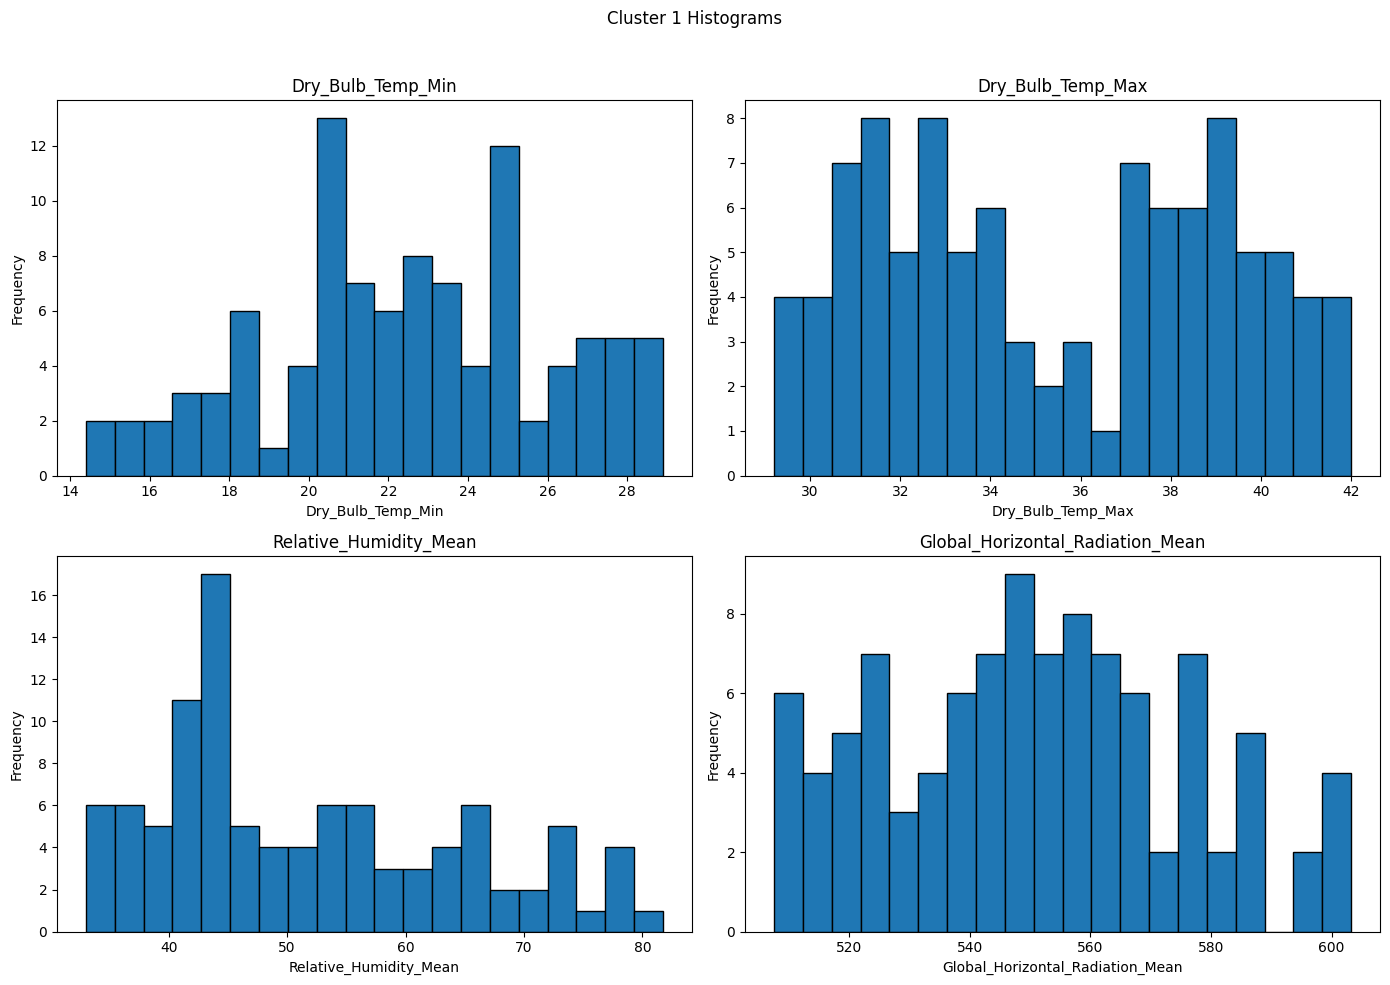

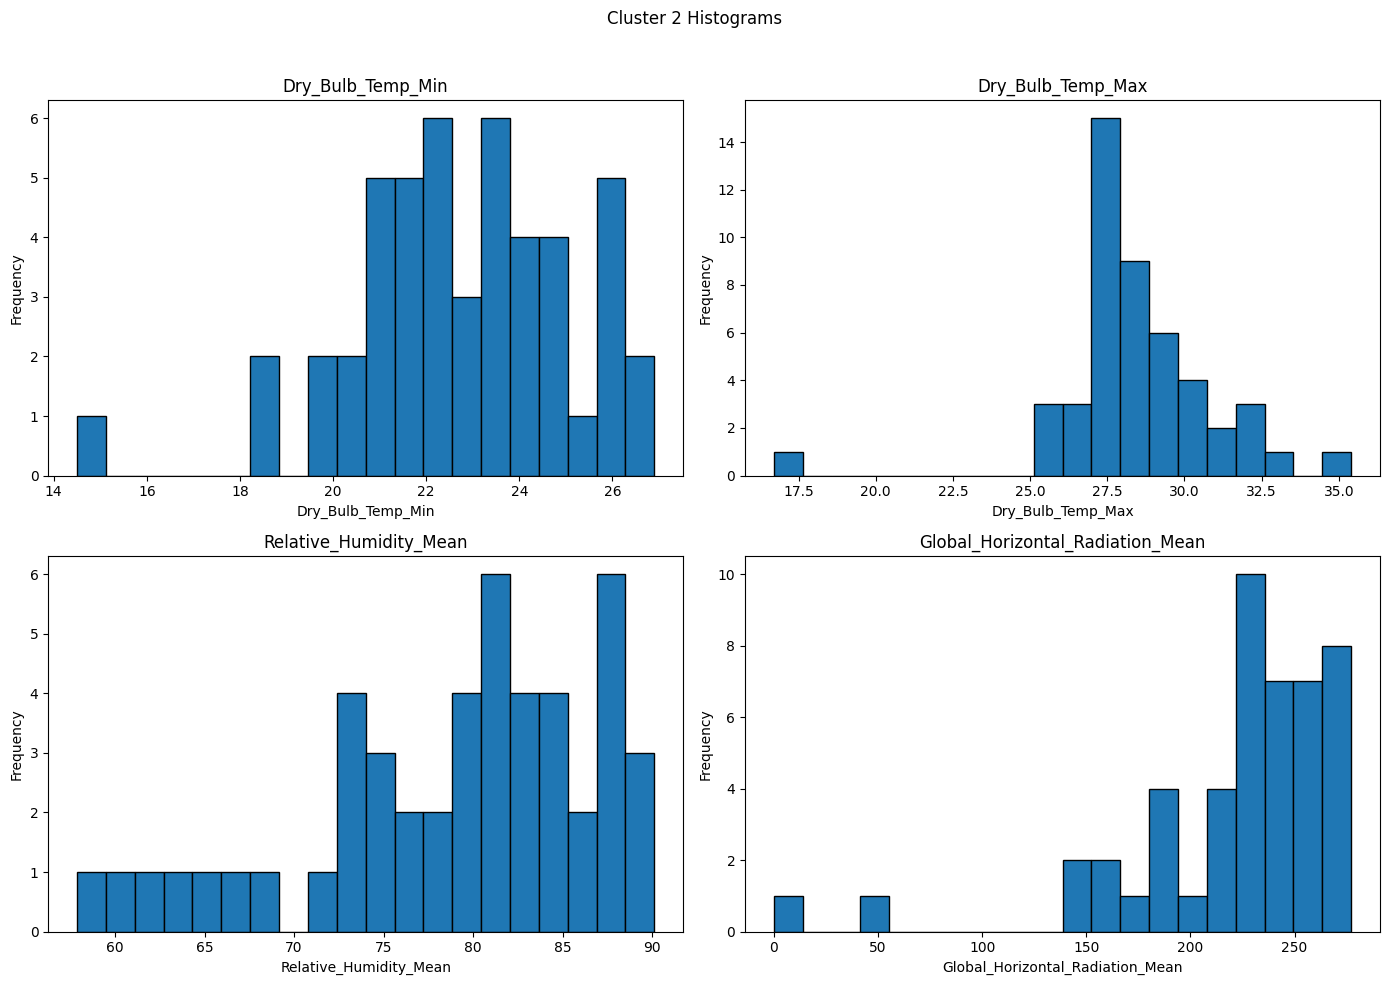

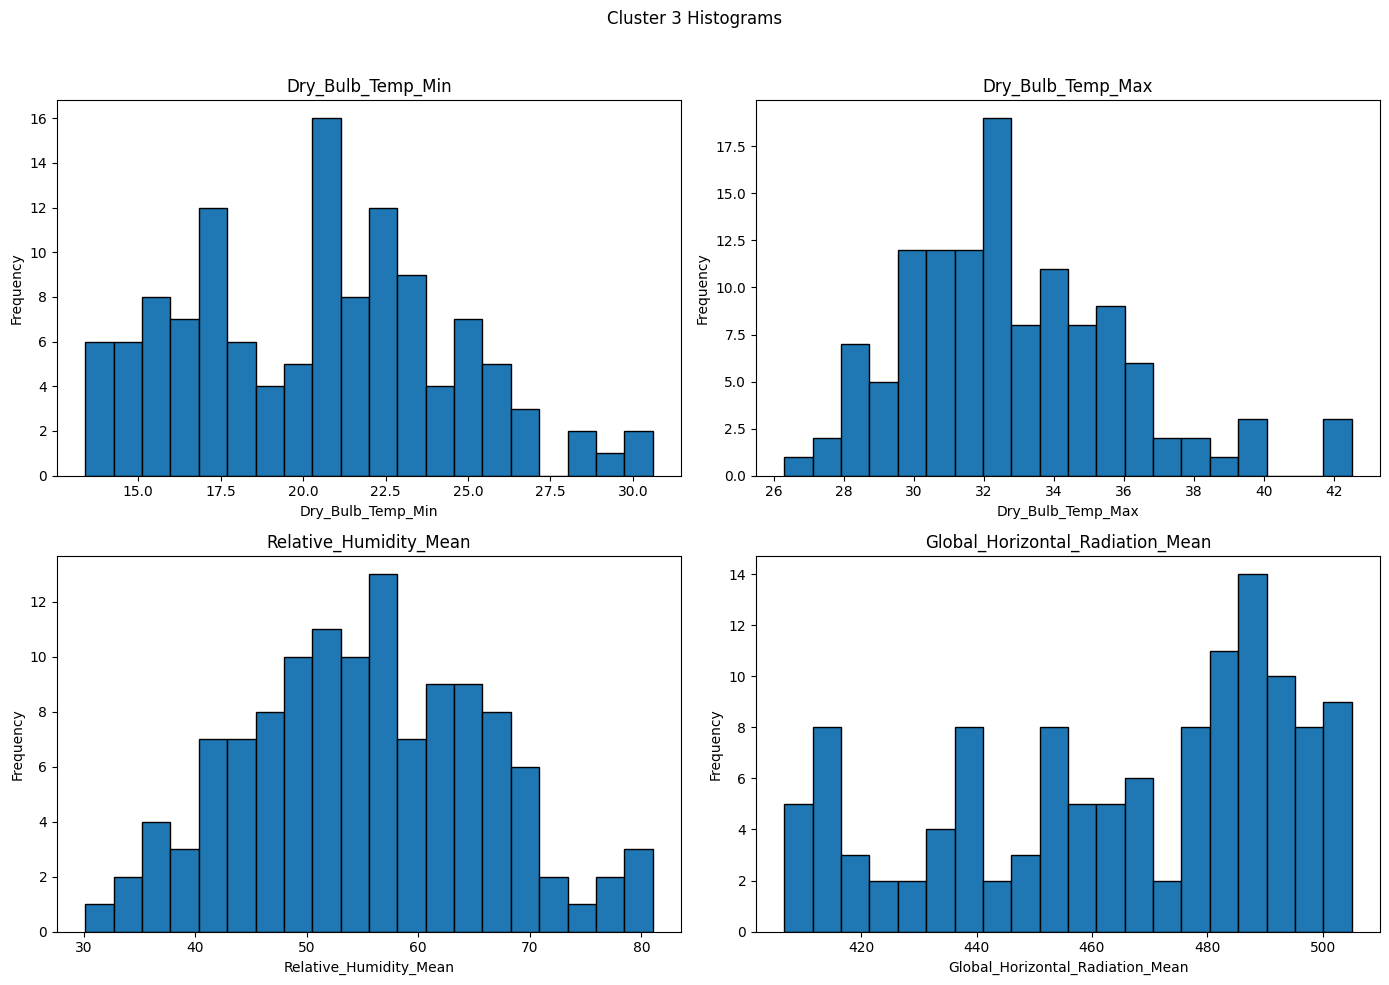

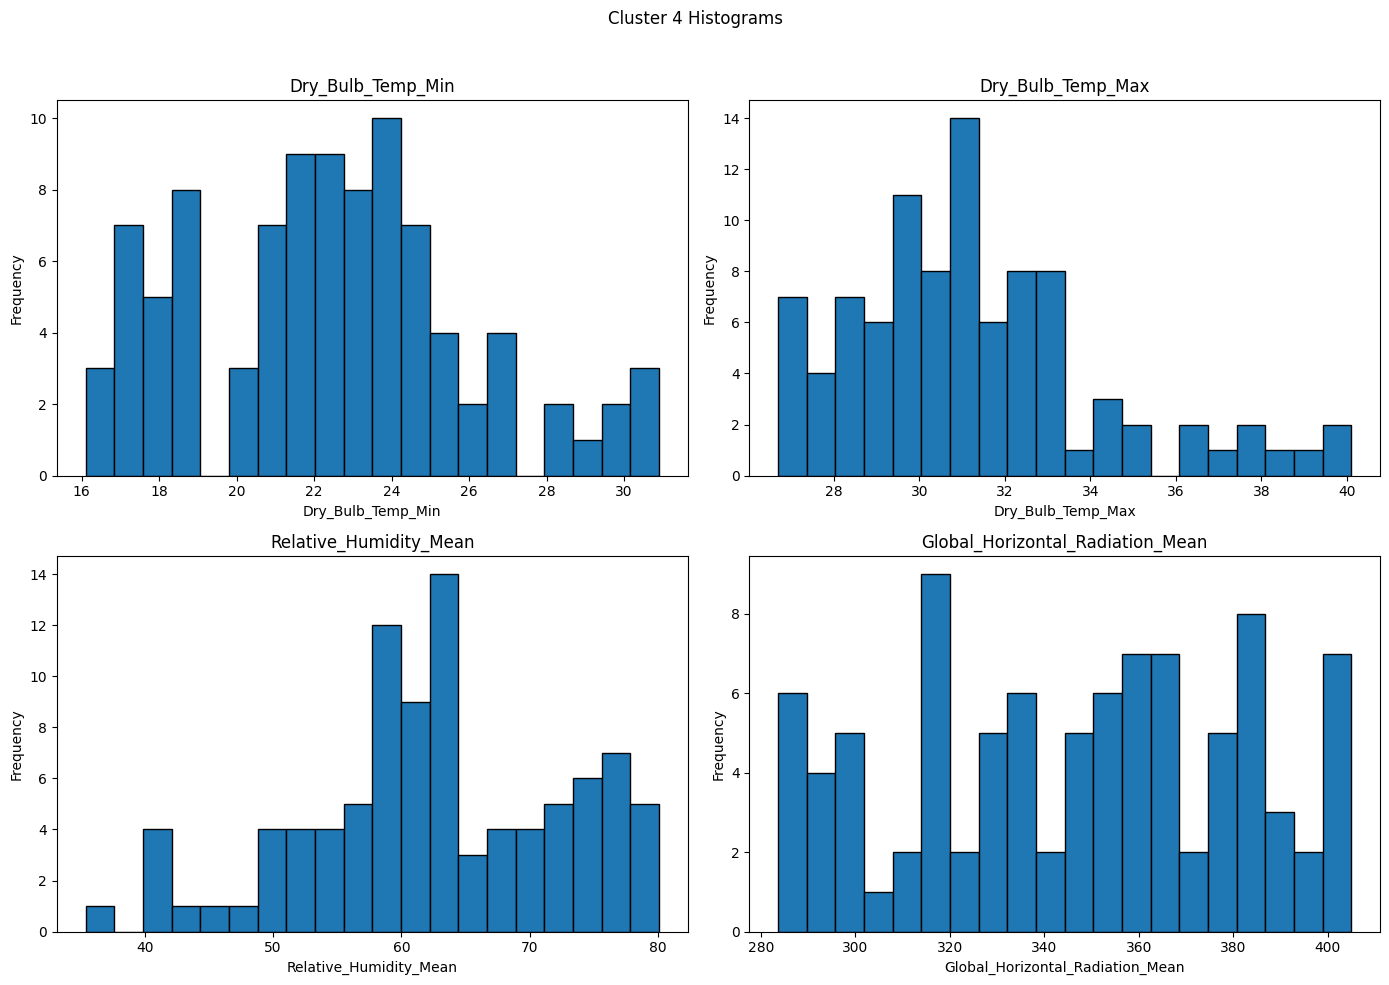

            Cluster
Day                
2005-01-01        1
2005-01-02        3
2005-01-03        2
2005-01-04        2
2005-01-05        2
...             ...
2005-12-28        2
2005-12-29        2
2005-12-30        1
2005-12-31        2
2006-01-01        1

[366 rows x 1 columns]


In [45]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/Hyderabad raw data.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 0].mean() if (x > 0).any() else 0)
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 20):  # Ensure each cluster has at least 20 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Check if any valid clusters were found
if not cluster_results:
    raise ValueError("No valid clusters found. Please check the data or clustering parameters.")

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Save the daily data with clusters to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/Hyderabad raw data trial000.xlsx'
daily_data.to_excel(output_file_path, index=True)
print(f'Clustered data saved to {output_file_path}')

# Plot histograms for each variable in each cluster
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

for cluster in range(best_clusters):
    cluster_data = daily_data[daily_data['Cluster'] == cluster]
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Cluster {cluster + 1} Histograms')
    
    for i, var in enumerate(variables):
        ax = axes[i // 2, i % 2]
        ax.hist(cluster_data[var], bins=20, edgecolor='black')
        ax.set_title(f'{var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequency')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Print the days along with their assigned cluster numbers
print(daily_data[['Cluster']])


Number of clusters: 4
Cluster
2    123
0    101
3     94
1     48
Name: count, dtype: int64
Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Hyderabad raw data trial1.xlsx


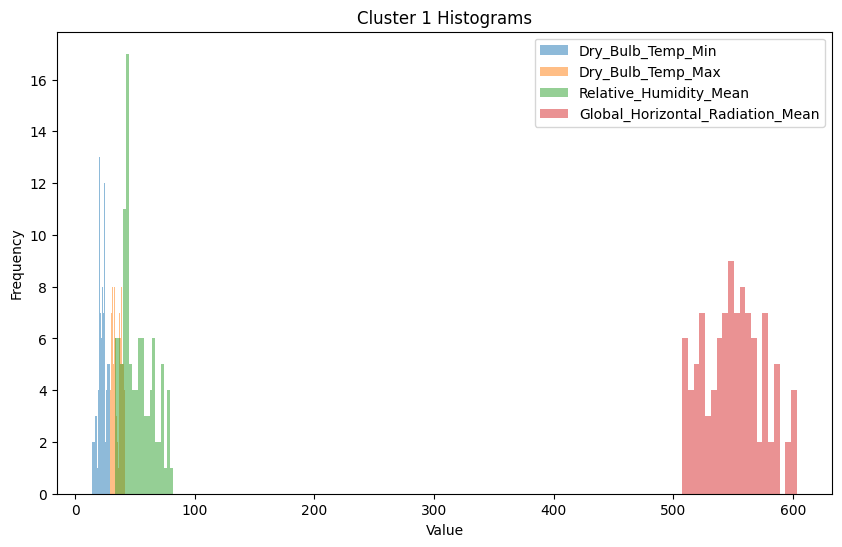

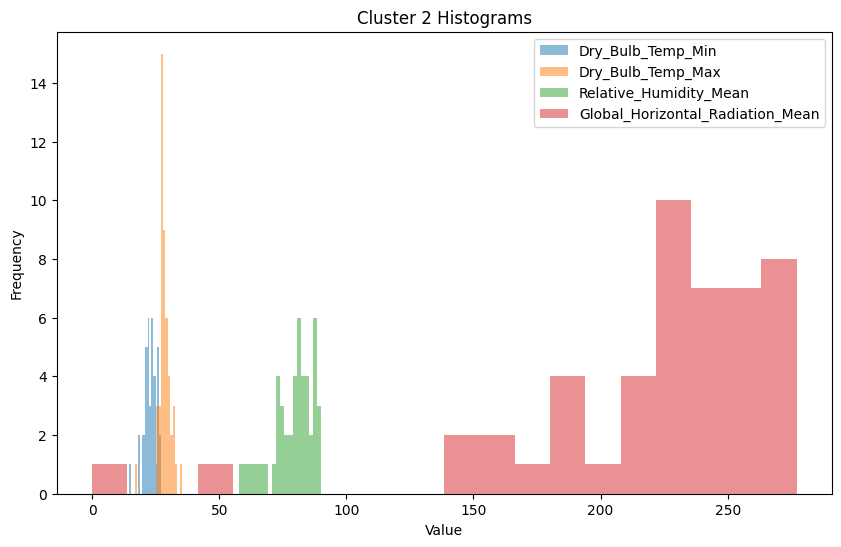

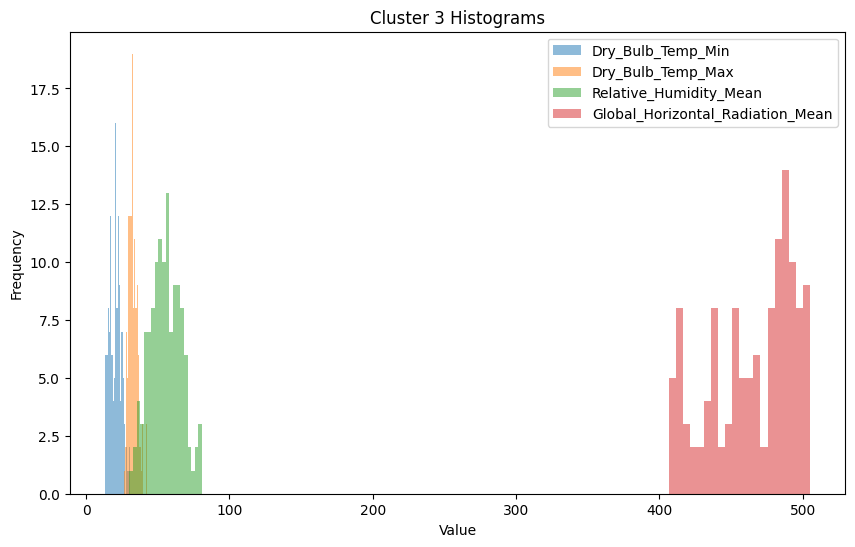

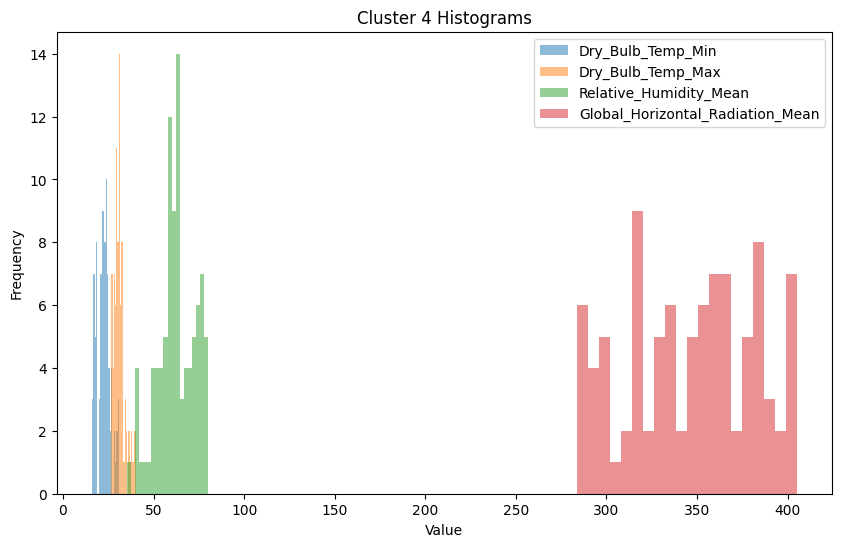

            Cluster
Day                
2005-01-01        1
2005-01-02        3
2005-01-03        2
2005-01-04        2
2005-01-05        2
...             ...
2005-12-28        2
2005-12-29        2
2005-12-30        1
2005-12-31        2
2006-01-01        1

[366 rows x 1 columns]


In [46]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/Hyderabad raw data.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 0].mean() if (x > 0).any() else 0)
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 20):  # Ensure each cluster has at least 20 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Check if any valid clusters were found
if not cluster_results:
    raise ValueError("No valid clusters found. Please check the data or clustering parameters.")

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Save the daily data with clusters to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Hyderabad raw data trial1.xlsx'
# daily_data.to_excel(output_file_path, index=True)
print(f'Clustered data saved to {output_file_path}')

# Plot histograms for all variables in each cluster in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

for cluster in range(best_clusters):
    cluster_data = daily_data[daily_data['Cluster'] == cluster]
    plt.figure(figsize=(10, 6))
    
    for var in variables:
        plt.hist(cluster_data[var], bins=20, alpha=0.5, label=var)
    
    plt.title(f'Cluster {cluster + 1} Histograms')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

# Print the days along with their assigned cluster numbers
print(daily_data[['Cluster']])


Number of clusters: 4
Cluster
2    123
0    101
3     94
1     48
Name: count, dtype: int64
Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Hyderabad raw data trial1.xlsx


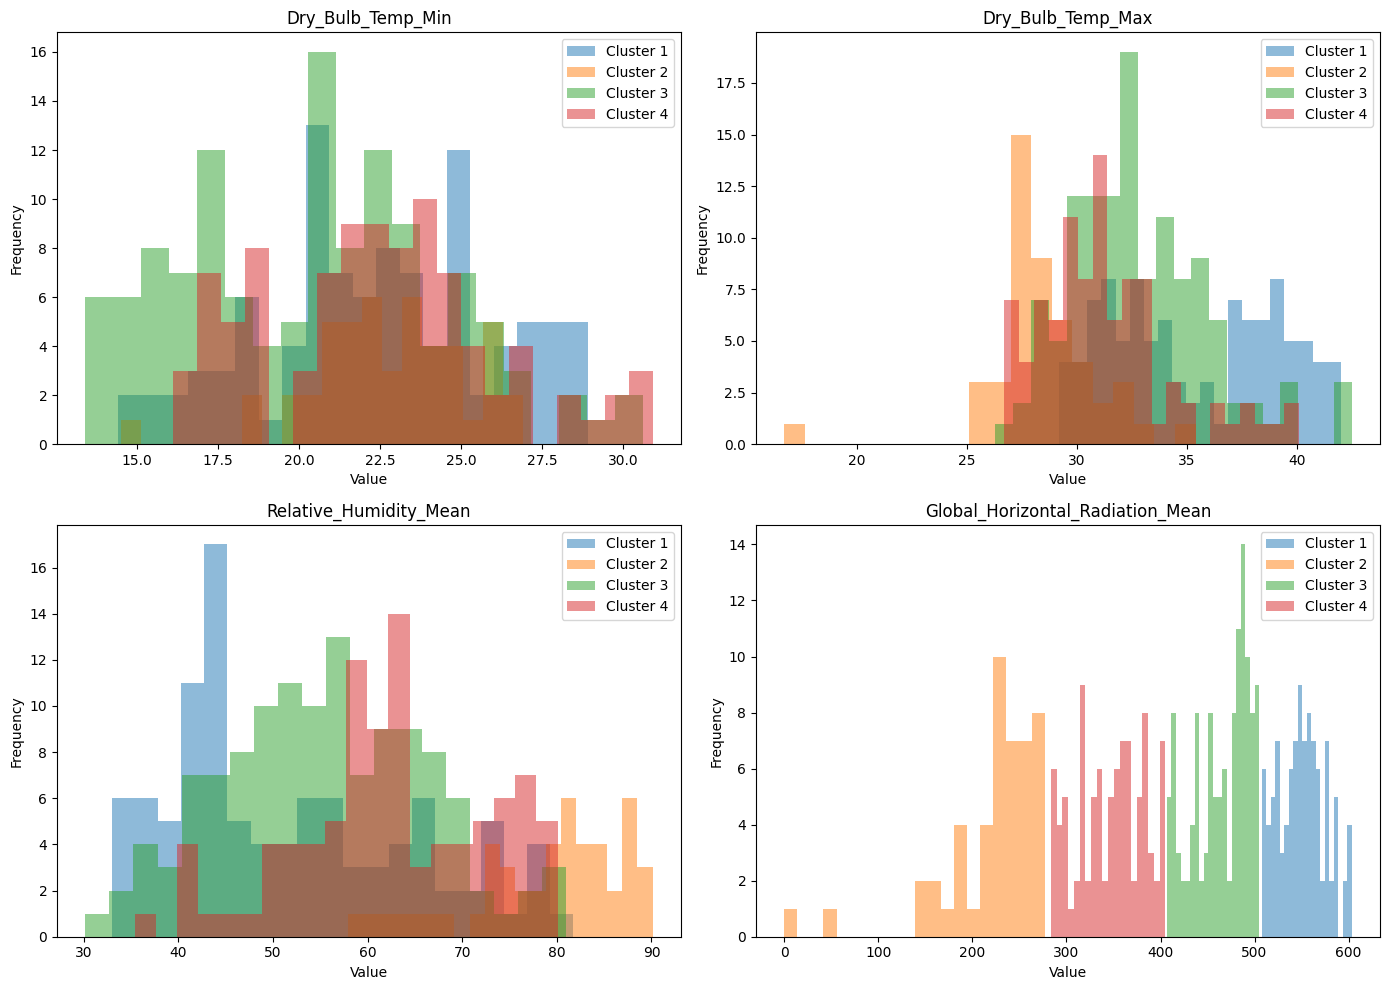

            Cluster
Day                
2005-01-01        1
2005-01-02        3
2005-01-03        2
2005-01-04        2
2005-01-05        2
...             ...
2005-12-28        2
2005-12-29        2
2005-12-30        1
2005-12-31        2
2006-01-01        1

[366 rows x 1 columns]


In [47]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/Hyderabad raw data.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 0].mean() if (x > 0).any() else 0)
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 20):  # Ensure each cluster has at least 20 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Check if any valid clusters were found
if not cluster_results:
    raise ValueError("No valid clusters found. Please check the data or clustering parameters.")

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Save the daily data with clusters to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Hyderabad raw data trial1.xlsx'
# daily_data.to_excel(output_file_path, index=True)
print(f'Clustered data saved to {output_file_path}')

# Plot histograms for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    for cluster in range(best_clusters):
        cluster_data = daily_data[daily_data['Cluster'] == cluster]
        axes[i].hist(cluster_data[var], bins=20, alpha=0.5, label=f'Cluster {cluster + 1}')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the days along with their assigned cluster numbers
print(daily_data[['Cluster']])


Number of clusters: 4
Cluster
2    123
0    101
3     94
1     48
Name: count, dtype: int64
Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Hyderabad raw data trial1.xlsx


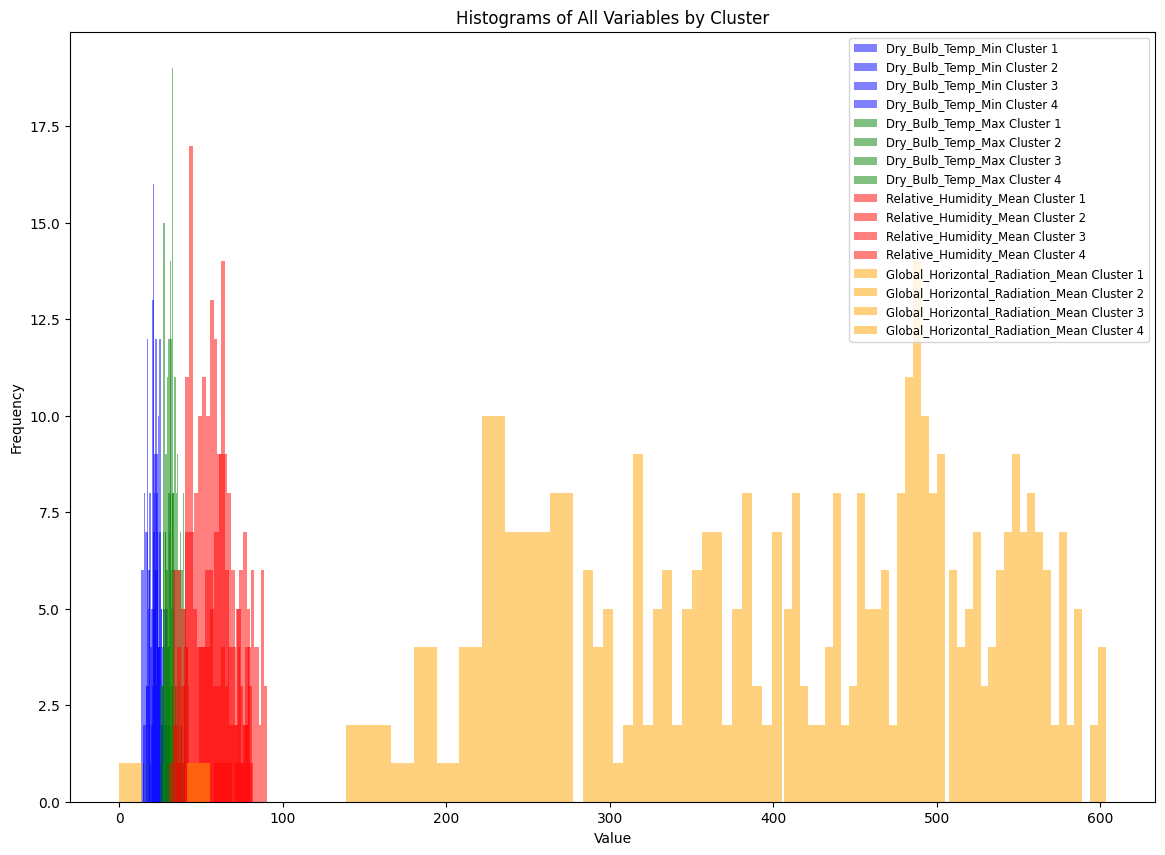

            Cluster
Day                
2005-01-01        1
2005-01-02        3
2005-01-03        2
2005-01-04        2
2005-01-05        2
...             ...
2005-12-28        2
2005-12-29        2
2005-12-30        1
2005-12-31        2
2006-01-01        1

[366 rows x 1 columns]


In [48]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/Hyderabad raw data.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 0].mean() if (x > 0).any() else 0)
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 20):  # Ensure each cluster has at least 20 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Check if any valid clusters were found
if not cluster_results:
    raise ValueError("No valid clusters found. Please check the data or clustering parameters.")

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Save the daily data with clusters to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Hyderabad raw data trial1.xlsx'
# daily_data.to_excel(output_file_path, index=True)
print(f'Clustered data saved to {output_file_path}')

# Plot histograms for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']
colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(14, 10))

for i, var in enumerate(variables):
    for cluster in range(best_clusters):
        cluster_data = daily_data[daily_data['Cluster'] == cluster]
        plt.hist(cluster_data[var], bins=20, alpha=0.5, label=f'{var} Cluster {cluster + 1}', color=colors[i])

plt.title('Histograms of All Variables by Cluster')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right', fontsize='small')
plt.show()

# Print the days along with their assigned cluster numbers
print(daily_data[['Cluster']])


In [58]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/Bengaluru raw data.xlsx'  # Replace with your file path "C:\Users\Alok Kumar Pandey\OneDrive\Desktop\coding\Hyderabad_daily_temperature_statistics.xlsx"
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 50].mean())
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6, ideal_clusters=[4, 5]):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 20):  # Ensure each cluster has at least 30 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Define colors for clusters
cluster_colors = ['FF5733', '33FF57', '5733FF', 'FF3357', '33FFFF', 'FFFF33'][:best_clusters]  # Hex color codes for each cluster

# Write colors to Excel sheet
with pd.ExcelWriter(output_file_path, engine='openpyxl', mode='a') as writer:
    daily_data.to_excel(writer, sheet_name='Sheet5', index=True)
    workbook = writer.book
    worksheet = workbook['Sheet5']
    
    # Write colors to Excel sheet
    for i, color in enumerate(cluster_colors):
        cell = worksheet.cell(row=i+2, column=daily_data.columns.get_loc('Cluster') + 2)
        cell.fill = PatternFill(start_color=color, end_color=color, fill_type="solid")

# Save the daily data with clusters to a new Excel file
output_file_path1 = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/Bengaluru raw data trial11.xlsx'
daily_data.to_excel(output_file_path1, index=True)
print(f'Clustered data saved to {output_file_path}')

# Print the days along with their assigned cluster numbers
print(daily_data[['Cluster']])


Number of clusters: 4
Cluster
2    144
0    100
1     67
3     54
Name: count, dtype: int64


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/Bengaluru raw data trial00.xlsx'

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/lucknow raw data.xlsx'  # Replace with your file path "C:\Users\Alok Kumar Pandey\OneDrive\Desktop\coding\Hyderabad_daily_temperature_statistics.xlsx"
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 50].mean())
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6, ideal_clusters=[4, 5]):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 20):  # Ensure each cluster has at least 30 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Save the daily data with clusters to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/lucknow raw data trial1.xlsx'
daily_data.to_excel(output_file_path, index=True)
print(f'Clustered data saved to {output_file_path}')

# Print the days along with their assigned cluster numbers
print(daily_data[['Cluster']])


Number of clusters: 4
Cluster
0    116
2    111
1    110
3     28
Name: count, dtype: int64
Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/lucknow raw data trial1.xlsx
            Cluster
Day                
2005-01-01        1
2005-01-02        3
2005-01-03        3
2005-01-04        1
2005-01-05        1
...             ...
2005-12-27        1
2005-12-28        1
2005-12-29        1
2005-12-30        1
2005-12-31        3

[365 rows x 1 columns]


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/hisar raw data.xlsx'  # Replace with your file path "C:\Users\Alok Kumar Pandey\OneDrive\Desktop\coding\Hyderabad_daily_temperature_statistics.xlsx"
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 50].mean())
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6, ideal_clusters=[4, 5]):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 20):  # Ensure each cluster has at least 30 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Save the daily data with clusters to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/hisar raw data trial1.xlsx'
daily_data.to_excel(output_file_path, index=True)
print(f'Clustered data saved to {output_file_path}')

# Print the days along with their assigned cluster numbers
print(daily_data[['Cluster']])


Number of clusters: 4
Cluster
1    111
0    104
3     94
2     56
Name: count, dtype: int64
Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/hisar raw data trial1.xlsx
            Cluster
Day                
2005-01-01        2
2005-01-02        1
2005-01-03        1
2005-01-04        1
2005-01-05        1
...             ...
2005-12-27        2
2005-12-28        1
2005-12-29        1
2005-12-30        2
2005-12-31        2

[365 rows x 1 columns]


In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Chennai raw file.xlsx'  # Replace with your file path "C:\Users\Alok Kumar Pandey\OneDrive\Desktop\coding\Hyderabad_daily_temperature_statistics.xlsx"
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 50].mean())
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6, ideal_clusters=[4, 5]):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 20):  # Ensure each cluster has at least 30 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Save the daily data with clusters to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Chennai raw data trial2.xlsx'
daily_data.to_excel(output_file_path, index=True)
print(f'Clustered data saved to {output_file_path}')

# Print the days along with their assigned cluster numbers
# print(daily_data[['Cluster']])

# Map the cluster number of daily defined clusters to the original hourly data
df = df.merge(daily_data[['Cluster']], left_on='Day', right_index=True, how='left')

# Calculate the properties of each cluster
def mean_greater_than_50(series):
    return series[series > 50].mean()

# Calculate the properties of each cluster
cluster_properties = df.groupby('Cluster').agg(
    Temp_Mean=('Dry Bulb Temperature', 'mean'),
    Temp_Min=('Dry Bulb Temperature', 'min'),
    Temp_Max=('Dry Bulb Temperature', 'max'),
    Humidity_Mean=('Relative Humidity', 'mean'),
    Humidity_Min=('Relative Humidity', 'min'),
    Humidity_Max=('Relative Humidity', 'max'),
    Radiation_Mean=('Global Horizontal Radiation', mean_greater_than_50),
    Radiation_Min=('Global Horizontal Radiation', 'min'),
    Radiation_Max=('Global Horizontal Radiation', 'max')
)

# Display the properties of each cluster
print(cluster_properties)

# Save the cluster properties to a new Excel file
output_properties_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Chennai cluster properties.xlsx'
cluster_properties.to_excel(output_properties_file_path)
print(f'Cluster properties saved to {output_properties_file_path}')

# Print the days along with their assigned cluster numbers
print(df[['datetime', 'Cluster']])


Number of clusters: 4
Cluster
1    135
2    114
0     75
3     41
Name: count, dtype: int64
Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Chennai raw data trial2.xlsx
         Temp_Mean  Temp_Min  Temp_Max  Humidity_Mean  Humidity_Min  \
Cluster                                                               
0.0      29.089333      20.0      38.2      72.995556            35   
1.0      29.310741      19.2      42.4      68.243827            28   
2.0      28.775786      19.8      42.5      69.619971            30   
3.0      28.449492      21.4      36.3      83.179878            46   

         Humidity_Max  Radiation_Mean  Radiation_Min  Radiation_Max  
Cluster                                                              
0.0               100      357.988736              0           1008  
1.0               100      584.631402              0           1022  
2.0               100      484.649593              0           1047  
3.0           

In [2]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/nainital raw data.xlsx"
data = pd.read_excel(file_path)

# Calculating the 10th, 20th, and 30th percentiles for the specified columns
percentiles = data[['Wind Speed', 'Wind Direction', 'Global Horizontal Radiation', 'Dry Bulb Temperature']].quantile([0.02, 0.9, 0.98])

# Finding the highest values for the specified columns
max_values = data[['Wind Speed', 'Global Horizontal Radiation']].max()

print(percentiles)
print()
print(max_values)

      Wind Speed  Wind Direction  Global Horizontal Radiation  \
0.02         0.0             9.0                          0.0   
0.90         2.0           324.0                        718.0   
0.98         3.1           351.0                        949.0   

      Dry Bulb Temperature  
0.02                   2.4  
0.90                  26.5  
0.98                  31.2  

Wind Speed                        5.3
Global Horizontal Radiation    1124.0
dtype: float64


In [3]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/leh ladakh raw data.xlsx"
data = pd.read_excel(file_path)

# Calculating the 10th, 20th, and 30th percentiles for the specified columns
percentiles = data[['Wind Speed', 'Wind Direction', 'Global Horizontal Radiation', 'Dry Bulb Temperature']].quantile([0.02, 0.9, 0.98])

# Finding the highest values for the specified columns
max_values = data[['Wind Speed', 'Global Horizontal Radiation']].max()

print(percentiles)
print()
print(max_values)

      Wind Speed  Wind Direction  Global Horizontal Radiation  \
0.02         0.1             9.0                          0.0   
0.90         5.3           324.0                        657.0   
0.98         8.1           351.0                       1029.0   

      Dry Bulb Temperature  
0.02                 -21.3  
0.90                  11.5  
0.98                  16.4  

Wind Speed                       16.7
Global Horizontal Radiation    1267.0
dtype: float64


In [4]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/jaisalmer raw data.xlsx"
data = pd.read_excel(file_path)

# Calculating the 10th, 20th, and 30th percentiles for the specified columns
percentiles = data[['Wind Speed', 'Wind Direction', 'Global Horizontal Radiation', 'Dry Bulb Temperature']].quantile([0.02, 0.9, 0.98])

# Finding the highest values for the specified columns
max_values = data[['Wind Speed', 'Global Horizontal Radiation']].max()

print(percentiles)
print()
print(max_values)

      Wind Speed  Wind Direction  Global Horizontal Radiation  \
0.02         0.2             9.0                          0.0   
0.90         6.4           324.0                        723.0   
0.98         9.3           351.0                        873.0   

      Dry Bulb Temperature  
0.02                  10.9  
0.90                  37.1  
0.98                  41.1  

Wind Speed                      13.9
Global Horizontal Radiation    979.0
dtype: float64


In [5]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Chennai raw file.xlsx"
data = pd.read_excel(file_path)

# Calculating the 10th, 20th, and 30th percentiles for the specified columns
percentiles = data[['Wind Speed', 'Wind Direction', 'Global Horizontal Radiation', 'Dry Bulb Temperature']].quantile([0.02, 0.9, 0.98])

# Finding the highest values for the specified columns
max_values = data[['Wind Speed', 'Global Horizontal Radiation']].max()

print(percentiles)
print()
print(max_values)

      Wind Speed  Wind Direction  Global Horizontal Radiation  \
0.02         0.0             8.0                         0.00   
0.90         3.1           333.0                       715.00   
0.98         5.4           354.0                       888.82   

      Dry Bulb Temperature  
0.02                  21.4  
0.90                  34.7  
0.98                  37.9  

Wind Speed                       12.4
Global Horizontal Radiation    1047.0
dtype: float64


In [13]:
import pandas as pd

# Load the Excel file
file_path = 'nainital raw data.xlsx'
data = pd.read_excel(file_path)

# Classifying the "Relative Humidity" column
def classify_humidity(value):
    if value < 40:
        return 'dry'
    elif 40 <= value <= 60:
        return 'comfortable'
    else:
        return 'humid'

data['Humidity Classification'] = data['Relative Humidity'].apply(classify_humidity)

# Classifying the "Dry Bulb Temperature" column
def classify_temperature(value):
    if value < 0:
        return 0
    elif 0 <= value < 5:
        return 1
    elif 5 <= value < 10:
        return 2
    elif 10 <= value < 15:
        return 3
    elif 15 <= value < 20:
        return 4
    elif 20 <= value < 25:
        return 5
    elif 25 <= value < 30:
        return 6
    elif 30 <= value < 35:
        return 7
    elif 35 <= value < 40:
        return 8
    else:
        return 9

data['Temperature Classification'] = data['Dry Bulb Temperature'].apply(classify_temperature)

# Save the updated DataFrame to a new sheet in the same Excel file
output_file_path = 'nainital raw data_updated.xlsx'

# Use ExcelWriter to write to the same file
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    # Write original data
    data.to_excel(writer, sheet_name='Original Data', index=False)

print("Updated file has been saved as:", output_file_path)


Updated file has been saved as: nainital raw data_updated.xlsx


         Day  Dry_Bulb_Temp_Min  Dry_Bulb_Temp_Max  Relative_Humidity_Mean  \
0 2005-01-01               22.0               29.5               67.772727   
1 2005-01-02               18.9               29.9               64.000000   
2 2005-01-03               16.9               32.0               54.250000   
3 2005-01-04               17.1               30.6               53.250000   
4 2005-01-05               17.1               30.2               55.541667   

   Global_Horizontal_Radiation_Mean  Cluster  
0                        264.777778        1  
1                        416.100000        3  
2                        548.500000        2  
3                        511.000000        2  
4                        491.000000        2  


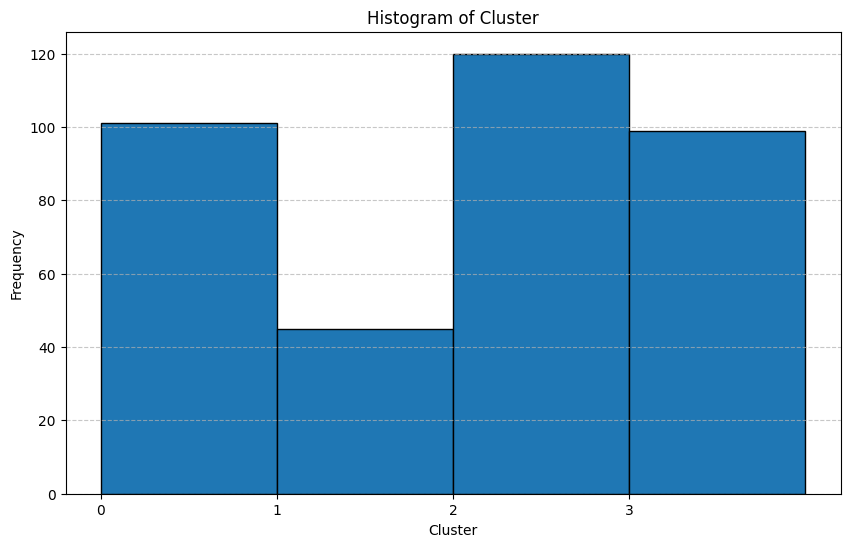

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data trial1.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Plotting the histogram of the 'Cluster' column
plt.figure(figsize=(10, 6))
plt.hist(df['Cluster'], bins=range(df['Cluster'].min(), df['Cluster'].max() + 2), edgecolor='black')
plt.title('Histogram of Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(range(df['Cluster'].min(), df['Cluster'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [5]:
import pandas as pd

# Load the data
file_paths = [
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/nainital raw data.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/jaisalmer raw data.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/leh ladakh raw data.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Chennai raw file.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/lucknow raw data.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/delhi raw file.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/agartala raw file.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/kutch raw data.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/dum duma raw file.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/shillong raw data.xlsx"
]

# Create empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Load and merge the relevant columns from each file
for file_path in file_paths:
    sheet_data = pd.read_excel(file_path)
    merged_data = pd.concat([merged_data, sheet_data[['Global Horizontal Radiation', 'Wind Speed']]], ignore_index=True)

# Filter the data for 'Global Horizontal Radiation' values greater than 50
filtered_data = merged_data[merged_data['Global Horizontal Radiation'] > 50]

file_path='C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/percentile.xlsx'
filtered_data.to_excel(file_path)

# Calculate the percentiles
percentiles = filtered_data.quantile([0.02, 0.33, 0.66, 0.99, 0.999])

# Separate the data into the specified ranges
range_0_33 = filtered_data[(filtered_data['Global Horizontal Radiation'] <= percentiles.loc[0.33, 'Global Horizontal Radiation']) & (filtered_data['Wind Speed'] <= percentiles.loc[0.33, 'Wind Speed'])]

range_34_66 = filtered_data[(filtered_data['Global Horizontal Radiation'] > percentiles.loc[0.33, 'Global Horizontal Radiation']) &
                            (filtered_data['Global Horizontal Radiation'] <= percentiles.loc[0.66, 'Global Horizontal Radiation']) &
                            (filtered_data['Wind Speed'] > percentiles.loc[0.33, 'Wind Speed']) &
                            (filtered_data['Wind Speed'] <= percentiles.loc[0.66, 'Wind Speed'])]

range_67_100 = filtered_data[(filtered_data['Global Horizontal Radiation'] > percentiles.loc[0.66, 'Global Horizontal Radiation']) & (filtered_data['Wind Speed'] > percentiles.loc[0.66, 'Wind Speed'])]

percentiles, range_0_33.shape[0], range_34_66.shape[0], range_67_100.shape[0]


(       Global Horizontal Radiation  Wind Speed
 0.330                        302.0         0.9
 0.660                        580.0         2.1
 0.990                       1004.0         8.3
 0.999                       1157.4        11.7,
 5418,
 4179,
 5572)

In [7]:
import pandas as pd

# Load the data
file_paths = [
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/nainital raw data.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/jaisalmer raw data.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/leh ladakh raw data.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Chennai raw file.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/lucknow raw data.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/delhi raw file.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/agartala raw file.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/kutch raw data.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/dum duma raw file.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/shillong raw data.xlsx"
]

# Create empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Load and merge the relevant columns from each file
for file_path in file_paths:
    sheet_data = pd.read_excel(file_path)
    merged_data = pd.concat([merged_data, sheet_data[['Global Horizontal Radiation', 'Wind Speed']]], ignore_index=True)

# Filter the data for 'Global Horizontal Radiation' values greater than 50
filtered_data = merged_data[merged_data['Global Horizontal Radiation'] > 50]

# Calculate the percentiles
percentiles = filtered_data.quantile([0.02, 0.33, 0.66, 0.99, 0.999])

# Separate the data into the specified ranges
range_0_33 = filtered_data[(filtered_data['Global Horizontal Radiation'] <= percentiles.loc[0.33, 'Global Horizontal Radiation']) & (filtered_data['Wind Speed'] <= percentiles.loc[0.33, 'Wind Speed'])]

range_34_66 = filtered_data[(filtered_data['Global Horizontal Radiation'] > percentiles.loc[0.33, 'Global Horizontal Radiation']) &
                            (filtered_data['Global Horizontal Radiation'] <= percentiles.loc[0.66, 'Global Horizontal Radiation']) &
                            (filtered_data['Wind Speed'] > percentiles.loc[0.33, 'Wind Speed']) &
                            (filtered_data['Wind Speed'] <= percentiles.loc[0.66, 'Wind Speed'])]

range_67_100 = filtered_data[(filtered_data['Global Horizontal Radiation'] > percentiles.loc[0.66, 'Global Horizontal Radiation']) & (filtered_data['Wind Speed'] > percentiles.loc[0.66, 'Wind Speed'])]

percentiles, range_0_33.shape[0], range_34_66.shape[0], range_67_100.shape[0]

(       Global Horizontal Radiation  Wind Speed
 0.020                       70.000         0.1
 0.330                      315.000         1.0
 0.660                      601.000         2.3
 0.990                     1043.240         9.2
 0.999                     1189.648        12.4,
 2715,
 2018,
 2623)

Number of clusters: 4
Cluster
0    125
1    120
2    112
3      8
Name: count, dtype: int64
Clustered data saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/shillong raw file trial000.xlsx
            Cluster
Day                
2005-01-01        2
2005-01-02        2
2005-01-03        2
2005-01-04        2
2005-01-05        2
...             ...
2005-12-27        2
2005-12-28        2
2005-12-29        2
2005-12-30        2
2005-12-31        2

[365 rows x 1 columns]


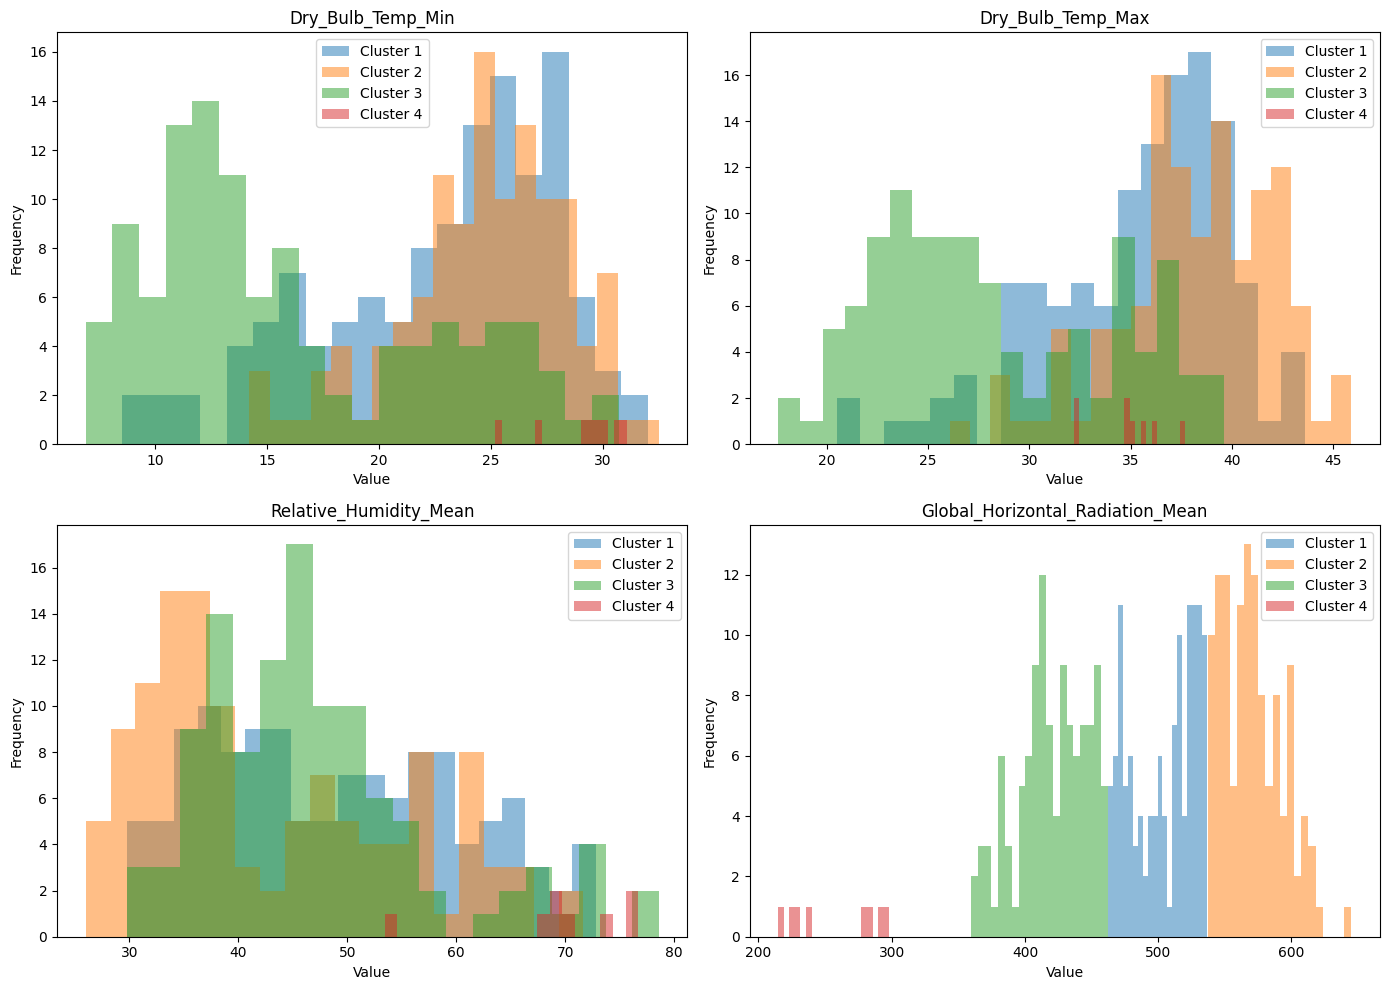

            Cluster
Day                
2005-01-01        2
2005-01-02        2
2005-01-03        2
2005-01-04        2
2005-01-05        2
...             ...
2005-12-27        2
2005-12-28        2
2005-12-29        2
2005-12-30        2
2005-12-31        2

[365 rows x 1 columns]


In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the uploaded Excel file
file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/climo intern/jaisalmer raw data.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert the datetime column to datetime format and extract the day
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.date

# Group by day and calculate the required statistics
daily_data = df.groupby('Day').agg(
    Dry_Bulb_Temp_Min=('Dry Bulb Temperature', 'min'),
    Dry_Bulb_Temp_Max=('Dry Bulb Temperature', 'max'),
    Relative_Humidity_Mean=('Relative Humidity', 'mean'),
    Global_Horizontal_Radiation_Mean=('Global Horizontal Radiation', lambda x: x[x > 50].mean())
).dropna()

# Function to perform K-means clustering with the specified number of clusters
def kmeans_clustering(data, min_clusters=3, max_clusters=6, ideal_clusters=[4, 5]):
    results = {}
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        if all(cluster_counts >= 0):  # Ensure each cluster has at least 0 days
            results[n_clusters] = cluster_counts
    return results

# Prepare the data for clustering
clustering_data = daily_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']]

# Perform clustering
cluster_results = kmeans_clustering(clustering_data)

# Choose the best number of clusters, ideally 4 or 5
best_clusters = min(cluster_results.keys(), key=lambda x: abs(x-4) if x in cluster_results else float('inf'))

# Perform final clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=best_clusters, random_state=42).fit(clustering_data)
daily_data['Cluster'] = kmeans_final.labels_

# Count the number of days in each cluster
cluster_counts_final = daily_data['Cluster'].value_counts()

# Display the final clustering results
print(f'Number of clusters: {best_clusters}')
print(cluster_counts_final)

# Save the daily data with clusters to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/shillong raw file trial000.xlsx'
# daily_data.to_excel(output_file_path, index=True)
print(f'Clustered data saved to {output_file_path}')

# Print the days along with their assigned cluster numbers
print(daily_data[['Cluster']])

# Plot histograms for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    for cluster in range(best_clusters):
        cluster_data = daily_data[daily_data['Cluster'] == cluster]
        axes[i].hist(cluster_data[var], bins=20, alpha=0.5, label=f'Cluster {cluster + 1}')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the days along with their assigned cluster numbers
print(daily_data[['Cluster']])


In [2]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Wanaparthy raw data.xlsx"
data = pd.read_excel(file_path)

# Filter the data to only consider rows where 'Global Horizontal Radiation' is greater than 50
filtered_data = data[data['Global Horizontal Radiation'] > 50]

# Calculate the required statistics
min_dry_bulb_temp = filtered_data['Dry Bulb Temperature'].min()
max_dry_bulb_temp = filtered_data['Dry Bulb Temperature'].max()
mean_relative_humidity = filtered_data['Relative Humidity'].mean()
mean_global_horizontal_radiation = filtered_data['Global Horizontal Radiation'].mean()

# Create a new dataframe with the results
results = pd.DataFrame({
    'Min Dry Bulb Temperature': [min_dry_bulb_temp],
    'Max Dry Bulb Temperature': [max_dry_bulb_temp],
    'Mean Relative Humidity': [mean_relative_humidity],
    'Mean Global Horizontal Radiation': [mean_global_horizontal_radiation]
})

# Save the results to a new Excel file
output_file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Wanaparthy raw data trial.xlsx"
results.to_excel(output_file_path, index=False)


In [3]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Wanaparthy raw data.xlsx"
data = pd.read_excel(file_path)

# Ensure the data is loaded properly
print(data.head())

# Group data by day (each day is 24 rows)
# Assuming there is a 'Time' or similar column to group by day

# Add a column for day, assuming data starts at the beginning of the day
data['Day'] = (data.index // 24) + 1

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_radiation.append(mean_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Min Dry Bulb Temperature': daily_min_temp,
    'Max Dry Bulb Temperature': daily_max_temp,
    'Mean Relative Humidity': daily_mean_humidity,
    'Mean Global Horizontal Radiation': daily_mean_radiation
})

# Save the results to a new Excel file
output_file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Wanaparthy raw data trial0.xlsx"
results.to_excel(output_file_path, index=False)
print(f"Results saved to {output_file_path}")


   Dry Bulb Temperature  Dew Point Temperature  Relative Humidity  \
0                  22.6                   19.8                 84   
1                  23.2                   19.4                 80   
2                  22.9                   19.2                 80   
3                  22.9                   19.2                 80   
4                  22.8                   16.2                 66   

   Atmospheric Station Pressure  Extraterrestrial Horizontal Radiation  \
0                         95206                                      0   
1                         95206                                      0   
2                         95206                                      0   
3                         95206                                      0   
4                         95206                                      0   

   Extraterrestrial Direct Normal Radiation  \
0                                         0   
1                                         0   

In [1]:
def temperature_classification(value):
    if value < 5:
        return "Extremely cold"
    elif 5 <= value < 10:
        return "Very cold"
    elif 10 <= value < 15:
        return "Cold"
    elif 15 <= value < 20:
        return "Cool"
    elif 20 <= value < 30:
        return "Comfortable"
    elif 30 <= value < 35:
        return "Warm"
    elif 35 <= value < 40:
        return "Hot"
    elif 40 <= value < 45:
        return "Very hot"
    else:
        return "Extremely hot"

Dry_Bulb_Temp_Min_Max_des = temperature_classification(min_temp_99p)
Dry_Bulb_Temp_Min_Min_des = temperature_classification(min_temp_1p)
Dry_Bulb_Temp_Min_Mean_des = temperature_classification(min_dbt_mean)
Dry_Bulb_Temp_Max_Max_des = temperature_classification(max_temp_99p)
Dry_Bulb_Temp_Max_Min_des = temperature_classification(max_temp_1p)
Dry_Bulb_Temp_Max_Mean_des = temperature_classification(max_dbt_mean)

4.0

In [ ]:
def ghi_classification(value):
    if value < 315:
        return "Low"
    elif 315 <= value < 601:
        return "Moderate"
    else:
        return "High"

Global_Horizontal_Radiation_Mean_Mean_des = ghi_classification(ghi_mean)

In [ ]:
def wind_speed_classification(value):
    if value < 1:
        return "Low"
    elif 1 <= value < 2.3:
        return "Moderate"
    else:
        return "High"

Mean_Wind_Speed_Day_des = wind_speed_classification(mean_wind_speed_day)
Mean_Wind_Speed_Night_des = wind_speed_classification(mean_wind_speed_night)
Prevalent_wind_speed_day_des = wind_speed_classification(prevalent_wind_speed_day)
Prevalent_wind_speed_night_des = wind_speed_classification(prevalent_wind_speed_night)

In [2]:
def humidity_classification(value):
    if value < 40:
        return "Dry"
    elif 40 <= value < 60:
        return "Comfortable"
    else:
        return "Humid"

Relative_Humidity_Mean_Mean_des = humidity_classification(relative_humidity_mean)

NameError: name 'relative_humidity_mean' is not defined

#### hohoho

In [37]:
import pandas as pd

# Load the data
file_paths = [
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_delhi_final.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_nainital_final.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_jaisalmer_final.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_ladakh_final.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/lucknow raw data.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_agartala_final.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_chennai_final.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/kutch raw data.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/dum duma raw file.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/shillong raw data.xlsx"
]

# Create empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Load and merge the relevant columns from each file
for file_path in file_paths:
    sheet_data = pd.read_excel(file_path)
    merged_data = pd.concat([merged_data, sheet_data[['a', 'b', 'c']]], ignore_index=True)

# Filter the data for 'Global Horizontal Radiation' values greater than 50
filtered_data = merged_data[merged_data['a'] >= 0]

# Calculate the percentiles
percentiles = filtered_data.quantile([0.02, 0.33, 0.66, 0.99, 0.999])
percentiles

,a,b,c
0.020,22.5,0.0,0.0
0.330,64.7,0.0,6.0
0.660,98.7,0.0,10.0
0.990,196.4,0.0,24.0
0.999,196.4,0.0,24.0


#### hehehe

In [16]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_chennai.xlsx"  # Replace with the correct file path
data = pd.read_excel(file_path)

# Ensure that 'Year', 'Month', and 'Day' columns are integers
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Day'] = data['Day'].astype(int)

# Create a date range for the entire year
start_date = pd.Timestamp(year=data['Year'].min(), month=1, day=1)
end_date = pd.Timestamp(year=data['Year'].min(), month=12, day=31)
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame for all days of the year
all_days_df = pd.DataFrame(all_days, columns=['Date'])
all_days_df['Year'] = all_days_df['Date'].dt.year
all_days_df['Month'] = all_days_df['Date'].dt.month
all_days_df['Day'] = all_days_df['Date'].dt.day

# Group by 'Year', 'Month', and 'Day' and sum the relevant columns
daily_data = data.groupby(['Year', 'Month', 'Day'])[['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable hours']].sum().reset_index()

# Merge with all_days_df to ensure all days are included
daily_data_full = all_days_df.merge(daily_data, on=['Year', 'Month', 'Day'], how='left')

# Fill NaN values with 0 (assuming missing data implies 0)
daily_data_full[['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable hours']] = daily_data_full[['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable hours']].fillna(0)

# Drop the 'Date' column as it is no longer needed
daily_data_full = daily_data_full.drop(columns=['Date'])

# Save the daily sums to a new Excel file
output_file_path = 'daily_sums_full_year_chennai.xlsx'  # Replace with the desired output file path
daily_data_full.to_excel(output_file_path, index=False)

print(f"Output file saved to {output_file_path}")


Output file saved to daily_sums_full_year_chennai.xlsx


In [17]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_chennai.xlsx"  # Replace with the correct file path
data = pd.read_excel(file_path)

# Ensure that 'Year', 'Month', and 'Day' columns are integers
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Day'] = data['Day'].astype(int)

# Create a date range for the entire year
start_date = pd.Timestamp(year=data['Year'].min(), month=1, day=1)
end_date = pd.Timestamp(year=data['Year'].min(), month=12, day=31)
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame for all days of the year
all_days_df = pd.DataFrame(all_days, columns=['Date'])
all_days_df['Year'] = all_days_df['Date'].dt.year
all_days_df['Month'] = all_days_df['Date'].dt.month
all_days_df['Day'] = all_days_df['Date'].dt.day

# Group by 'Year', 'Month', and 'Day' and sum the relevant columns
daily_data = data.groupby(['Year', 'Month', 'Day'])[['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable hours']].sum().reset_index()

# Merge with all_days_df to ensure all days are included
daily_data_full = all_days_df.merge(daily_data, on=['Year', 'Month', 'Day'], how='left')

# Fill NaN values with 0 (assuming missing data implies 0)
daily_data_full[['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable hours']] = daily_data_full[['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable hours']].fillna(0)

# Drop the 'Date' column as it is no longer needed
daily_data_full = daily_data_full.drop(columns=['Date'])

# Save the daily sums to a new Excel file
output_file_path = 'daily_sums_full_year_chennnnnai.xlsx'  # Replace with the desired output file path
daily_data_full.to_excel(output_file_path, index=False)

print(f"Output file saved to {output_file_path}")


Output file saved to daily_sums_full_year_chennnnnai.xlsx


In [18]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_chennai.xlsx"   # Replace with the correct file path
data = pd.read_excel(file_path)

# Ensure the relevant columns are present
required_columns = ['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable hours']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"One or more required columns are missing: {required_columns}")

# Create a datetime index based on the assumption that data starts from the first hour of the year
start_date = pd.Timestamp(year=2002, month=1, day=1)  # Adjust the year accordingly
data['Datetime'] = pd.date_range(start=start_date, periods=len(data), freq='H')

# Extract the date part
data['Date'] = data['Datetime'].dt.date

# Group by 'Date' and sum the relevant columns
daily_data = data.groupby('Date')[required_columns].sum().reset_index()

# Generate all dates in the year
all_dates = pd.date_range(start='2002-01-01', end='2002-12-31').date
all_dates_df = pd.DataFrame(all_dates, columns=['Date'])

# Merge with all_dates_df to ensure all days are included
daily_data_full = all_dates_df.merge(daily_data, on='Date', how='left')

# Fill NaN values with 0 (assuming missing data implies 0)
daily_data_full[required_columns] = daily_data_full[required_columns].fillna(0)

# Save the daily sums to a new Excel file
output_file_path = 'daily_sums_full_year_chennnn.xlsx'  # Replace with the desired output file path
daily_data_full.to_excel(output_file_path, index=False)

print(f"Output file saved to {output_file_path}")


Output file saved to daily_sums_full_year_chennnn.xlsx


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_9348\4063820639.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['Datetime'] = pd.date_range(start=start_date, periods=len(data), freq='H')


In [20]:
import pandas as pd
# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_chennai.xlsx"
data = pd.read_excel(file_path)

In [21]:
# Group data by day (each day is 24 rows)
data['Day'] = (data.index // 24) + 1

In [22]:
output_file_path = 'daily_sums_full_year_chenn.xlsx'  # Replace with the desired output file path
data.to_excel(output_file_path, index=False)

In [29]:
import pandas as pd
# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/daily_sums_full_year_chenn.xlsx"
data = pd.read_excel(file_path)

In [30]:
for Day in range(1, 366):
    # Calculate heating and cooling degree hours
    heating_degree_hours = data['Heating Degree Hours'].sum()
    cooling_degree_hours = data['Cooling Degree Hours'].sum()
    comfortable_hours = data['Comfortable hours'].sum()

    data['Heating Degree Hours daily'] = heating_degree_hours
    data['Cooling Degree Hours daily'] = cooling_degree_hours
    data['Comfortable Hours daily'] = comfortable_hours



In [31]:
output_file_path = 'daily_sums_full_year_chenniiiii.xlsx'  # Replace with the desired output file path
data.to_excel(output_file_path, index=False)

In [39]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_chennai.xlsx"
df = pd.read_excel(file_path)

# Create a 'Day' column assuming each row represents an hour
df['Dew'] = (df.index // 24) + 1

# Group by 'Day' and calculate the daily sum for the relevant columns
daily_sums = df.groupby('Dew').sum()

# Select only the relevant columns
daily_sums = daily_sums[['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable Hours']]

# Save the results to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_chennai.xlsx'  # Replace with the desired output file path
daily_sums.to_excel(output_file_path, index=False)

print("Daily sums have been calculated and saved to 'daily_sums.xlsx'.")


TypeError: datetime64 type does not support sum operations

In [3]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_jaisalmer.xlsx"
df = pd.read_excel(file_path)

# Create a 'Day' column assuming each row represents an hour
df['Day'] = (df.index // 24) + 1

# Select only numeric columns for aggregation
numeric_column = ['Heating Degree Hours']
numeric_column1 = ['Cooling Degree Hours']
numeric_column2 = ['Comfortable hours']

# Group by 'Day' and calculate the daily sum for the relevant columns
df['Heating Degree Hours daily'] = df.groupby('Day')[numeric_column].sum()
df['Cooling Degree Hours daily'] = df.groupby('Day')[numeric_column1].sum()
df['Comfortable hours daily'] = df.groupby('Day')[numeric_column2].sum()

# Save the results to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_jaisalmer.xlsx'  # Replace with the desired output file path
df.to_excel(output_file_path, index=False)

print("Daily sums have been calculated and saved to 'daily_sums.xlsx'.")


Daily sums have been calculated and saved to 'daily_sums.xlsx'.


In [32]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_delhi.xlsx"
df = pd.read_excel(file_path)

# Create a 'Day' column assuming each row represents an hour
df['Day'] = (df.index // 24) + 1

# Select only numeric columns for aggregation
numeric_column = ['Heating Degree Hours']
numeric_column1 = ['Cooling Degree Hours']
numeric_column2 = ['Comfortable hours']

# Group by 'Day' and calculate the daily sum for the relevant columns
df['Heating Degree Hours daily'] = df.groupby('Day')[numeric_column].sum()
df['Cooling Degree Hours daily'] = df.groupby('Day')[numeric_column1].sum()
df['Comfortable hours daily'] = df.groupby('Day')[numeric_column2].sum()

# Merge the daily sums back into the original DataFrame
df = df.merge(daily_sums, on='Day', suffixes=('', ' daily'))

# Save the results to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_delhi.xlsx'  # Replace with the desired output file path
df.to_excel(output_file_path, index=False)

print("Daily sums have been calculated and saved to 'cluster_properties_daily_sum_agartala.xlsx'.")


Daily sums have been calculated and saved to 'cluster_properties_daily_sum_agartala.xlsx'.


In [33]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_delhi.xlsx"
df = pd.read_excel(file_path)

# Extract unique rows from intervals of 24 rows
unique_rows = df.iloc[::24, :]

# Select the columns of interest
numeric_column = ['Heating Degree Hours daily']
numeric_column1 = ['Cooling Degree Hours daily']
numeric_column2 = ['Comfortable hours daily']

# Create a new DataFrame with only the unique rows for the columns of interest
df['a'] = unique_rows['Heating Degree Hours daily.1']
df['b'] = unique_rows['Cooling Degree Hours daily.1']
df['c'] = unique_rows['Comfortable hours daily.1']

# Save the unique rows to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_delhi_final.xlsx'  # Replace with the desired output file path
df.to_excel(output_file_path, index=False)

print("Unique rows have been extracted and saved to 'unique_daily_sums_jaisalmer.xlsx'.")


Unique rows have been extracted and saved to 'unique_daily_sums_jaisalmer.xlsx'.


In [ ]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_jaisalmer.xlsx"
df = pd.read_excel(file_path)

# Create a 'Day' column assuming each row represents an hour
df['Day'] = (df.index // 24) + 1

# Select only numeric columns for aggregation
numeric_columns = ['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable hours']

# Group by 'Day' and calculate the daily sum for the relevant columns
daily_sums = df.groupby('Day')[numeric_columns].sum().reset_index()

# Merge the daily sums back into the original DataFrame, matching each day with its sum
df = df.merge(daily_sums, on='Day', suffixes=('', '_daily'))

# Keep only the daily sums for the first hour of each day and set others to NaN
df.loc[df.groupby('Day').cumcount() != 0, [f'{col}_daily' for col in numeric_columns]] = None

# Save the results to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_jaisalmer.xlsx'  # Replace with the desired output file path
df.to_excel(output_file_path, index=False)

print("Daily sums have been calculated and saved to 'cluster_properties_daily_sum_jaisalmer.xlsx'.")


In [40]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_chennai.xlsx"
df = pd.read_excel(file_path)

# Calculate the day number assuming each row represents an hour
df['Dew'] = (df.index // 24) + 1

# Group by 'Day' and calculate the daily sum for the relevant columns
daily_sums = df.groupby('Dew').sum()

# Select only the relevant columns
daily_sums = daily_sums[['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable Hours']]

# Save the results to a new Excel file
output_file_path = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/cluster_properties_daily_sum_chennai11.xlsx'  # Replace with the desired output file path
daily_sums.to_excel(output_file_path, index=False)

print("Daily sums have been calculated and saved to 'daily_sums.xlsx'.")


TypeError: datetime64 type does not support sum operations

In [2]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data.xlsx"
df = pd.read_excel(file_path)

# Creating the three new columns based on the 'Dry Bulb Temperature' values
# df['Dry Bulb Temperature < 20'] = df['Dry Bulb Temperature'].apply(lambda x: x if x < 20 else None)
# df['Dry Bulb Temperature 20-30'] = df['Dry Bulb Temperature'].apply(lambda x: x if 20 <= x <= 30 else None)
# df['Dry Bulb Temperature > 30'] = df['Dry Bulb Temperature'].apply(lambda x: x if x > 30 else None)

# Calculate heating and cooling degree hours
df['Heating Degree Temperature'] = df['Dry Bulb Temperature'].apply(lambda x: x if x < 20 else np.nan)
df['Cooling Degree Temperature'] = df['Dry Bulb Temperature'].apply(lambda x: x if x > 30 else np.nan)

df['Heating Degree Hours'] = df['Heating Degree Temperature'].apply(lambda x: 20 - x if pd.notna(x) else 0)
df['Cooling Degree Hours'] = df['Cooling Degree Temperature'].apply(lambda x: x - 30 if pd.notna(x) else 0)


In [3]:
# Calculate comfortable hours
df['Comfortable temperature'] = df['Dry Bulb Temperature'].apply(lambda x: x if 20 < x < 30 else np.nan)
df['Comfortable hours'] = df['Comfortable temperature'].apply(lambda x: 1 if pd.notna(x) else 0)

In [4]:
df.to_excel("C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data trial.xlsx", index=False)

In [9]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data trial.xlsx"   # Replace with the correct file path
data = pd.read_excel(file_path)

# Ensure the relevant columns are present
required_columns = ['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable hours']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"One or more required columns are missing: {required_columns}")

# Create a datetime index based on the assumption that data starts from the first hour of the year
start_date = pd.Timestamp(year=2002, month=1, day=1)  # Adjust the year accordingly
data['Datetime'] = pd.date_range(start=start_date, periods=len(data), freq='H')

# Extract the date part
data['Date'] = data['Datetime'].dt.date

# Group by 'Date' and sum the relevant columns
daily_data = data.groupby('Date')[required_columns].sum().reset_index()

# Generate all dates in the year
all_dates = pd.date_range(start='2002-01-01', end='2002-12-31').date
all_dates_df = pd.DataFrame(all_dates, columns=['Date'])

# Merge with all_dates_df to ensure all days are included
daily_data_full = all_dates_df.merge(daily_data, on='Date', how='left')

# Fill NaN values with 0 (assuming missing data implies 0)
daily_data_full[required_columns] = daily_data_full[required_columns].fillna(0)

# Save the daily sums to a new Excel file
output_file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data trial final.xlsx"  # Replace with the desired output file path
daily_data_full.to_excel(output_file_path, index=False)

print(f"Output file saved to {output_file_path}")


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/leh ladakh raw data trial.xlsx'

In [18]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/delhi raw file.xlsx"
df = pd.read_excel(file_path)

# Calculate heating and cooling degree hours
df['Heating Degree Temperature'] = df['Dry Bulb Temperature'].apply(lambda x: x if x < 20 else np.nan)
df['Cooling Degree Temperature'] = df['Dry Bulb Temperature'].apply(lambda x: x if x > 30 else np.nan)

df['Heating Degree Hours'] = df['Heating Degree Temperature'].apply(lambda x: 20 - x if pd.notna(x) else 0)
df['Cooling Degree Hours'] = df['Cooling Degree Temperature'].apply(lambda x: x - 30 if pd.notna(x) else 0)

# Calculate comfortable hours
df['Comfortable temperature'] = df['Dry Bulb Temperature'].apply(lambda x: x if 20 < x < 30 else np.nan)
df['Comfortable hours'] = df['Comfortable temperature'].apply(lambda x: 1 if pd.notna(x) else 0)

df.to_excel("C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/delhi raw file trial.xlsx", index=False)

In [19]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/delhi raw file trial.xlsx"   # Replace with the correct file path
data = pd.read_excel(file_path)

# Ensure the relevant columns are present
required_columns = ['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable hours']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"One or more required columns are missing: {required_columns}")

# Create a datetime index based on the assumption that data starts from the first hour of the year
start_date = pd.Timestamp(year=2002, month=1, day=1)  # Adjust the year accordingly
data['Datetime'] = pd.date_range(start=start_date, periods=len(data), freq='H')

# Extract the date part
data['Date'] = data['Datetime'].dt.date

# Group by 'Date' and sum the relevant columns
daily_data = data.groupby('Date')[required_columns].sum().reset_index()

# Generate all dates in the year
all_dates = pd.date_range(start='2002-01-01', end='2002-12-31').date
all_dates_df = pd.DataFrame(all_dates, columns=['Date'])

# Merge with all_dates_df to ensure all days are included
daily_data_full = all_dates_df.merge(daily_data, on='Date', how='left')

# Fill NaN values with 0 (assuming missing data implies 0)
daily_data_full[required_columns] = daily_data_full[required_columns].fillna(0)

# Save the daily sums to a new Excel file
output_file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/delhi raw file trial final.xlsx"  # Replace with the desired output file path
daily_data_full.to_excel(output_file_path, index=False)

print(f"Output file saved to {output_file_path}")


Output file saved to C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/delhi raw file trial final.xlsx


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_4704\287497348.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['Datetime'] = pd.date_range(start=start_date, periods=len(data), freq='H')


In [35]:
import pandas as pd

# Load the data
file_paths = [
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/delhi raw file trial final.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Chennai raw file trial final.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/agartala raw file trial final.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/jaisalmer raw data trial final.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data trial final.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/leh ladakh raw data trial final.xlsx",
    "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/nainital raw data trial final.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/kutch raw data.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/dum duma raw file.xlsx",
    # "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/shillong raw data.xlsx"
]

# Create empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Load and merge the relevant columns from each file
for file_path in file_paths:
    sheet_data = pd.read_excel(file_path)
    merged_data = pd.concat([merged_data, sheet_data[['Heating Degree Hours', 'Cooling Degree Hours', 'Comfortable hours']]], ignore_index=True)

# Filter the data for 'Global Horizontal Radiation' values greater than 50
filtered_data = merged_data[merged_data['Heating Degree Hours'] > 0]
# filtered_data = merged_data[merged_data['Cooling Degree Hours'] > 0]
# filtered_data = merged_data[merged_data['Comfortable hours'] > 0]

# Calculate the percentiles
percentiles = filtered_data.quantile([0.2, 0.4, 0.6, 0.8])
percentiles

,Heating Degree Hours,Cooling Degree Hours,Comfortable hours
0.2,23.86,0.0,0.0
0.4,75.20,0.0,0.0
0.6,194.02,0.0,8.4
0.8,456.06,0.0,13.0
